# Глава 4: Работа с числовыми данными


Введение:

Количественные данные что-то измеряют— будь то размер класса, ежемесячные продажи или оценки учащихся. 
Естественным способом представления этих вели­ чин является численное (например, 29 студентов, $529 392 продаж). 
В этой главе мы рассмотрим многочисленные стратегии преобразования сырых числовых дан­ ных в признаки, целенаправленно формируемые для машинно-обучающихся алго­ритмов.

# 4.1 Шкалирование признака

Задача: Требуется прошкалировать числовой признак в диапазон между двумя значениями.

Решение: для шкалирования массива признаков использовать класс MinMaxScaler библиотеки scikit-learn

Обуждение: 

Шкалирование - общепринятая задача предобработки в машинном самобучении. Многие алгоритмы, описываемые далее в этой книге, исходят из того, что все признаки находятся в одной шкале, как правило от 0 до 1 или от -1 до 1.

Существует целый ряд методов шкалирования, но один из самых простых называется минимаксным шкалированием.

В минимаксном шкалировании минимальное и максимальное значения признака используются для шкалирования значений в пределах диапазона. 
В частности, минимакс вычисляется следующим образом:

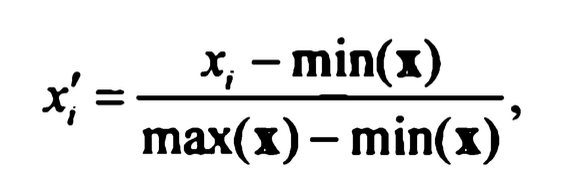

Где x - вектор признака, x(i) - отдельный эл-нт признака x





In [29]:
import numpy as np 
from sklearn import preprocessing

# Создать признак:
feature = np.array([[-500.5],
                    [-100.0], 
                    [0],
                    [100.1],
                    [900.9]])

# Создать шкалировщик:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

# Прошклировать признак:
scaled_feature = minmax_scale.fit_transform(feature)

# Показать прошклированный признак:
scaled_feature

array([[0.        ],
       [0.28578564],
       [0.35714286],
       [0.42857143],
       [1.        ]])

Класс библиотеки scikit-leam MinMaxScaier предлагает два варианта шкалирования признака.

Один вариант — использовать метод fit для вычисления минимального и максимального значений признака, а затем применить метод transform для шка­ лирования признака. 

Второй вариант — вызвать метод fit transform для выполне­ ния обеих операций одновременно.
 
Между этими двумя вариантами нет никакой математической разницы, но иногда есть практическая выгода в том, чтобы разде­ лить эти операции, потому что это позволяет применять одно и то же преобразова­ ние к разным наборам данных.

# 4.2 Стандартизация признака

Задача: Требуется преобразовать признак, чтобы он имел среднее значение 0 и стандартное отклонение 1

Решение: Класс standardscaier библиотеки scikit-leam выполняет оба преобразования

In [8]:
# Создать признак:
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])

# Создать шкалироващик:
scaler = preprocessing.StandardScaler()

# Преобразовать признак:
standardized = scaler.fit_transform(x)

standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

Обсуждение:
Распространенной альтернативой "минимаксному шкалированию", описанному мной в 4.1, является шкалирование признаков, при котором они должны быть приближенно стандартно распределены.

Для этого я использую стандартизацию, в ходе которой данные преобразуются таким образом, что они имеют среднее зна­чение х = 0 и стандартное отклонение sigma = 1.

В частности, каждый элемент в при­знаке преобразуется таким образом, чтобы:

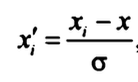

х' — стандартизированная форма х,. Преобразованный признак пред­ставляет собой количество стандартных отклонений, на которое исходное значение отстоит от среднего значения признака (так называемую z-оценку в статистике)

В машинном самообучении стандартизация является распространенным методом шкалирования с целью предобработки и по моему опыту используется больше, чем минимаксное шкалирование. 

Однако вариант шкалирования зависит от обучающегося алгоритма.

Например, анализ главных компонентов часто работает лучше с использованием стандартизации, в то время как для нейронок часто рекомендуется минимаксное шкалирование (оба алгоритма я распишу). 

В качестве общего правила, если у вас нет конкретной причины использовать альтернативу, рекомендуется применять стандартизацию. 

Мы можем увидеть эффект стандартизации, обратившись к среднему значению и стандартному отклонению результата моего решения:

In [12]:
print(f'Среднее: {round(standardized.mean())}')
print(f'Стандартное отклонение: {standardized.std()}')

Среднее: 0
Стандартное отклонение: 1.0


Если ваши данные имеют значительные выбросы, это может негативно повлить на стандартизацию, сказываясь на среднем значении и дисперсии признака. 

В таком случае вместо этого часто бывает полезно прошкалировать признак, используя медиану и квартильных размах. 

В scikit-learn мы делаем это с помощью класса RobutScaler, реализующего метод робастного шкалирования.  

* Робастное шкалирование - это метод преобразования данных, который делает их менее чувствительными к выбросам или экстремальным значениям. Оно полезно для данных, которые могут иметь несколько крайних значений, искажающих обычные меры центральной тенденции и разброса


In [13]:
# Создаю шкалироващик 
robust_scaler = preprocessing.RobustScaler()

# Преобразую признак
robust_scaler.fit_transform(x)


array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

# 4.3 Нормализация наблюдений

Задача: 
Требуется прошкалировать значения признаков в наблюдениях для получения еди­ничной нормы (общей длиной 1).

Решение: Использовать класс Normalizer с аргументом norm

In [18]:
# Загрузить библиотеки
import numpy as np 
from sklearn.preprocessing import Normalizer

# Создать матрицу признаков
features = np.array([[0.5, 0.5],
                    [1.1, 3.4], 
                    [1.5, 20.2],
                    [1.63, 34.4],
                    [10.9, 3.3]])

# Создать Нормализатор
normalizer = Normalizer(norm='l2')

# Преобразовать матрицу признаков
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

Обсуждение:

Многие методы шкалирования (например минимаксное шкалирование и стандартизация) работают с признаками; однако мы также можем шкалировать отдельные наблюдения. 

Класс Normalizer шкалирует значения в отдельных наблюдениях, приводя их к единичной норме (сумма их длин равна 1).

Этот тип шкалирования часто используют, когда имеется много эквивалентных признаков (например, в классификации текста, когда каждое слово или группа n-слов является признаком).

Класс Normalizer предоставляет три варианта нормы, при этом евклидова норма (нередко именуемая L^2 - нормой) является аргументом по умолчанию:

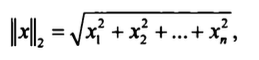


Где x - это отдельное наблюдение; Xn - значение этого наблюдения для n-го признака

In [19]:
# Преобразовать матрицу признаков
features_l2_norm = Normalizer(norm='l2').transform(features)

features_l2_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

В качестве альтернативы можно указать манхэттенскую норму (L^1):

In [20]:
# Преобразовать матрицу признаков
features_l1_norm = Normalizer(norm='l1').transform(features)

features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

Интуитивно норму L^2 можно рассматривать как расстояние между двумя точками в Москве, пролетаемое птицей (то есть по прямой), в то время как L^1 можно воспринимать как расстояние пройденного человека пути по улицам (пройти несколько улиц на север, потом столько же на восток, север и так далее), поэтому её называют "манхэттенской нормой" или " таксомоторной нормой".

На практике стоит обращать внимание, что norm = 'l1' шкалирует значения наблюдений таким образом, что они в сумме дают 1.

Иногда такая сумма может быть желательным качеством:

In [21]:
print('Сумма значений из первого наблюдения:', features_l1_norm[0,0] + features_l1_norm[0,1])

Сумма значений из первого наблюдения: 1.0


# 4.4 Генерирование полиномальных и взаимодействующих признаков

Задача: Требуется создать полиномиальные и взаимодействующие признаки.

Решение: Несмотря на то что некоторые спецы выбирают создание взаимодействующих признаков вручную, библиотека scikit-learn предлагает встроенный метод:

In [23]:
# Загружаю библиотеки
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Создаю матрицу признаков
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# Создать объект PolynomialFeatures
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

# Создать полиномиальные признаки
polynomial_interaction.fit_transform(features) 

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

Параметр "degree" определяет максимальный порядок полинома. 

Например, degree=2 создаст новые признаки, возведенные во вторую степень:

В то время как degree = 3 создаст новые признаки, при этом возводя их и во вторую и в третью степень:

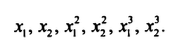

Более того, по умолчанию метод, реализованный в классе PolynomialFeatures, включает в себя признаки взаимодействия:

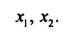

Мы можем ограничить создаваемые признаки только признаками взаимодействия, установив для interaction_only значение True:

In [25]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

Обсуждение:
Полиномиальные признаки часто создаются, когда мы предполагаем, что сущест­вует нелинейная связь между признаками и целью. 

Например, мы можем подозре­вать, что влияние возраста на вероятность наличия серьезных заболеваний не явля­ется постоянным с течением времени, а возрастает по мере увеличения возраста. 

Мы можем закодировать этот неконстантный эффект в признаке х, генерируя фор­мы этого признака более высокого порядка (х^2, х^3 и так далее.).


Кроме того, нередко мы сталкиваемся с ситуациями, когда эффект одного признака зависит от ещё одного признака. 

Простыми примером была бы попытка предсказать, является ли наш кофе сладким, и при этом у нас всего два признака:

1) был ли кофе перемешан
2) добавляли ли мы сахар?

Отдельно каждый признак сладость кофе не предсказывает, но сочетание признаков это делает. 
То есть кофе будет сладким, только если в нем есть сахар и он перемешан.

Влияние каждого признака на цель (сладость) зависит друг от друга. Мы можем кодировать эту связь, включив взаимодействующий признак, который является произведение отдельных признаков.

# 4.5 Преобразование признаков (Интересная фишка)

Задача: Требуется выполнить собственное преобразование одного или более признаков.

Решение: 
Использовать класс FunctionTransformer библиотеки scikit-leam для применения функции к набору признаков:

In [26]:
# Загрузить библиотеки 
import numpy as np 
from sklearn.preprocessing import FunctionTransformer

# Создать матрицу признаков
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# Определить простую функцию
def add_ten(x):
    return x + 10

# Создать преобразователь 
ten_transformer = FunctionTransformer(add_ten)

# Преобразовать матрицу признаков
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

Такое же преобразование можно создать в библиотеке pandas с помощью метода "apply":

In [28]:
import pandas as pd

# Создать фрейм данных
df = pd.DataFrame(features, columns=['признак_1', 'признак_2'])

# применить функцию 
df.apply(add_ten)

,признак_1,признак_2
0,12,13
1,12,13
2,12,13


Обсуждение:
Очень часто возникает необходимость выполнить некоторые преобразования для одного или более признаков. 

Например, мы можем создать признак, который является натуральным логарифмом значений другого признака. 

Мы можем сделать это, создав функцию, а затем отобразив её на признаки с помощью класса FunctionTransformer библиотеки scikit-learn, либо метода apply из pandas.

В этом решении мы создали крйне изичную функцию, но ничто не мешает нам сделать что-то другое, все зависит от целей и задач. 


# 4.6 Обнаружение выбросов

Задача: Требуется идентфицировать предельные значения

Решение: Обнаружение выбросов по большей части искусство, нежели наука. Вместе с тем, распространенным методом является принятие допущения о том, что данные нормально распределены.

Основываясь на этом допущении, мы можем "рисовать" эллипс вокруг данных, классифицируя любое наблюдение внутри него не как выброс (помеченный, как 1) и любое наблюдение за пределами эллипса, как выброс (помеченный, как -1)

In [2]:
# Загружаю библиотеки
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

In [12]:
# Создаю симулированные данные 
features, _ = make_blobs(n_features = 2,
                         n_samples = 10,
                         centers = 1,
                         random_state= 1)

# Заменяю значения первого наблюдения предельными значениями 
features[0,0] = 10000
features[0,1] = 10000

# Создаю детектор 
outlier_detector = EllipticEnvelope(contamination = .1)

# Подгонка детектора 
outlier_detector.fit(features)

# Предсказать выбросы
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Основным ограничением этого подхода является необходимость указания параметра загрязнения "contamination", который представляет собой долю наблюдений, являющихся выбросами, - значение, которое мы не знаем. 

Подумаем о загрязнении как о нашей оценке чистоты наших данных. Если мы ожидаем, что наши данные будут иметь несколько выбросов, мы можем задать параметр "contamination" с каким-нибудь небольшим значением. 

Однако, если мы считаем что данные скорее всего будут иметь выбросы, мы можем установить для него более высокое значение. 


Вместо того, чтобы смотреть на наблюдения в целом, мы можем взглянуть на отдельные признаки и идентифицировать в этих признаках предельные значения, используя межквартальный размах (MKP, IQR):

In [14]:
# Создаю один признак
feature = features[:,0]

# Создать функцию, которая возвращает индекс выбросов
def indicies_of_outliers(x):

    q1, q3 = np.percentile(x, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound)| (x < lower_bound))

indicies_of_outliers(feature)

(array([0]),)

Межквартильный размах — это разница между первым и третьим квартилями набора данных. 

МКР можно представить, как разброс основной части данных, где выбросы — это наблюдения, отдаленные от основной части данных. 

Выбросы обычно определяются как любое значение, которое на 1.5 МКР меньше первого квартиля или на 1.5 МКР больше третьего квартиля.

Обсуждение:

Единого наилучшего метода обнаружения выбросов не существует. Вместо этого у нас есть коллекция методов, все со своими преимуществами и недостатками. На­ша лучшая стратегия часто состоит в том, чтобы пытаться использовать несколько методов (например, и EilipticEnveiope, и обнаружение на основе МКР) и смотреть на результаты в целом.

Если это вообще возможно, мы должны взглянуть на наблюдения, которые мы об­ наруживаем как выбросы, и попытаться их понять. Например, возьмем набор дан­ных о домах, в котором одним из признаков является количество комнат. Является ли выброс со 100 комнатами действительно домом или это на самом деле отель, который был неправильно классифицирован?

Дополнительные материалы для чтения: "Три способа обнаружения выбросов", блог-пост (и исходный код функции МКР, используемой в этом рецепте; http://bit.ly/2FzMC2k).

# 4.7 Обработка выбросов

Задача: Имеются выбросы

Решение: Для их обработки, как правило, можно использовать три стратегии. Во-первых, мы можем их отбросить. 


In [16]:
import pandas as pd 

# Создаю фрейм данных
houses = pd.DataFrame()
houses['Цена'] = [54433, 39233, 293222, 4322032]
houses['Ванные'] = [2, 3.5, 2, 116]
houses['Кв_футы'] = [1500, 2500, 1500, 48000]

# Отфильтровать наблюдения
houses[houses['Ванные'] < 20]

,Цена,Ванные,Кв_футы
0,54433,2.0,1500
1,39233,3.5,2500
2,293222,2.0,1500


Во-вторых, мы можем поместить их как выбросы и включить их в качестве признака:


In [17]:
import numpy as np 

# Создать признак на булева условия
houses['Выброс'] = np.where(houses['Ванные'] < 20, 0 , 1)

# Показать данные:
houses


,Цена,Ванные,Кв_футы,Выброс
0,54433,2.0,1500,0
1,39233,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


Наконец, можем преобразовать признак, чтобы ослабить эффект выброса 

In [18]:
# Взять логарифм признака
houses['Логарифм кв_футов'] = [np.log(x) for x in houses['Кв_футы']]

# Смотрим данные
houses

,Цена,Ванные,Кв_футы,Выброс,Логарифм кв_футов
0,54433,2.0,1500,0,7.313220
1,39233,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


Обсуждение:

Подобно обнаружению выбросов, раз и навсегда заведенного правила обработки выбросов не существует. Стратегия должна основываться на двух аспектах. Во-первых, мы должны понять, что делает данные выбросами. Если мы считаем, что это ошибки в данных, например, из-за сломанного датчика или неверного значения, то мы можем исключить это наблюдение или заменить значения выбросов на NaN, т. к. этим значениям нельзя верить. Однако если мы считаем, что выбросы являют­ся подлинными предельными значениями (например, дом [особняк] с 200 ванными комнатами), то более уместной будет маркировка их как выбросы или преобразова­ние их значений.

Во-вторых, стратегия обработки выбросов должна основываться на нашей цели машинного самообучения. Например, если мы хотим предсказать цены на жилье на основе признаков дома, то было бы разумно предположить, что цена на особняки с более чем 100 ванными комнатами обусловлена другой динамикой, чем обычные семейные дома. Кроме того, если мы готовим модель для использования в качестве части веб-приложения онлайнового кредитования на жилье, то можно предполо­жить, что среди клиентов не будет миллиардеров, желающих купить особняк.

Итак, что же нам делать, если имеются выбросы? Подумайте о том, почему они являются выбросами, держите в уме конечную цель обучения и, самое главное, помните, что непринятие решения об устранении выбросов само по себе является решением с последствиями.

Один дополнительный момент: если в данных имеются выбросы, то стандартизация может оказаться неуместной, потому что среднее значение и дисперсия сильно зависят от выбросов. В этом случае следует использовать более робастный метод шкалирования против выбросов, наподобие реализованного в классе RobustScaier.

Дополнительные материалы для чтения: Документация по робастному шкалировщику RobustScaier (http://bit.Iy/2DcgyNT).

# 4.8 Дискретизация признаков

Задача: Дан числовой признак, и требуется разбить его на дискретные корзины.

Решение: В зависимости от того, как мы хотим разбить данные, существует два метода, которые можно применить. 

Во-первых, можно бинаризировать признак в соотвествии с некоторым порогом, т.е перевести его значения в двоичные:

In [2]:
import numpy as np 
from sklearn.preprocessing import Binarizer

In [4]:
# Создаю признак
age = np.array([[6],
                [12], 
                [20], 
                [36], 
                [65]])


# Создал биноризатор
binarizer = Binarizer()

# Преобразовываю признак
binarizer.fit_transform(age)

array([[1],
       [1],
       [1],
       [1],
       [1]])

Во-вторых можем разбить числовые признаки в соответствии с несколькими порогами:

In [6]:
# Разношу признак по корзинам
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

Обратите внимание, что аргументы для параметра bins обозначают левый край каждой корзины.

Например, аргумент 20 не включает элемент со значением 20, только два значения меньше 20. 

Это поведение можно переключить, задав для параметра right зачение True:

In [13]:
# Разнести признак по корзинам
np.digitize(age, bins = [20,30,64], right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]])

Обсуждение:

Дискретизация может быть плодотворной стратегией, когда у нас есть основания полагать, что числовой признак должен вести себя больше как категориальный признак. Например, можно полагать, что существует очень небольшая разница в привычках расходования 19 и 20-летних, но значительная разница между 20 и 21-летними (возраст в Соединенных Штатах, когда молодые люди могут употреб­лять алкоголь). В этом примере было бы полезно соотнести людей в наших данных с теми категориями, когда можно употреблять алкоголь и когда нельзя этого делать. Аналогичным образом, в других случаях может быть полезно дискретизи­ровать наши данные в три или более корзин.

В нашем решении мы увидели два метода дискретизации — класс Binarizer биб­лиотеки scikit-learn для двух корзин и функцию digitize библиотеки NumPy для трех корзин или больше. Вместе с тем функция digitize также может использо­ваться для бинаризации признаков, как Binarizer, если задать только один порог:

In [14]:
np.digitize(age, bins = [18])

array([[0],
       [0],
       [1],
       [1],
       [1]])

Дополнительные материалы для чтения:
Документация по функции digitize (http://bit.ly/2HSciFP).

# 4.9 Группирование наблюдений с помощью кластеризации 

Задача: Требуется сгруппировать наблюдения так, чтобы похожие наблюдения находились в одной группе.

Решение: Если мы знаем, что имеется K групп, то можно применить кластеризацию по методу K средних для группирования похожих наблюдений и вывода нового признака, содержащего групповую принадлежность каждого наблюдения. 

In [15]:
import pandas as pd 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

/var/folders/ym/1stkpf9161g9k_wbnvf_4jrh0000gn/T/ipykernel_1598/1208934468.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [23]:
# Создаю матрицу симулированных признаков
features, _ = make_blobs(n_samples = 50,
                         n_features = 2,
                         centers = 3,
                         random_state = 1)

# Создаю фрейм данных 
dataframe = pd.DataFrame(features, columns=['признак_1', 'признак_2'])

# Создаю кластеризатор по методу K средних
clusterer = KMeans(3, random_state=0)

# Выполняю подгонку кластеризатора
clusterer.fit(features)

# Предсказываю значения 
dataframe['группа'] = clusterer.predict(features)

dataframe.head(5)


,признак_1,признак_2,группа
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0


-----------------------------------------------------------------------------------------------------

Немного забегаем вперед, позже более подробно здесь мной будут описаны кластеризирующие признаки. 

Но стоит обратить своё внимание на то, что кластеризация может быть использована в качестве шага предобратки. В частности, я использовал для кластеризации наблюдений в группы неконтроллируемые (то есть без учителя) обучающие методы, такие как k средних.
 
В конечном итоге результатом служит категориальный признак, в котором аналогичные признаки принадлежат одной группе.

Нет ничего критичного в том, если вы не поняли всего этого прямо сейчас: просто возьмите на заметку идею о том, что кластеризация может использоваться в предобработке. 

И если вы действительно не можете ждать, то прямо сейчас смело перелистайте страницы до главы 19.

# 4.10 Удаление значений с пропущенными значениями

Задача: Требуется удалить наблюдения, содержащие пропущенные значения

Решение: В библиотеке NumPy есть конструкция, которая позволит это сделать 


In [13]:
import numpy as np 

# Матрица признаков
features = np.array([[1.1, 11.1], 
                     [2.2, 22.2], 
                     [3.3, 33.3], 
                     [4.4, 44.4],
                     [np.nan, 55]])

# Оставляю только те наблюдения, которые не пропущены
features[~np.isnan(features).any(axis=1)] 

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

В качестве альтернативы можно удалить наблюдения, содержащие пропущенные значения с помощью Pandas

In [9]:
import pandas as pd 

# Загружаю данные
data = pd.DataFrame(features, columns=['признак_1', 'признак_2'])
data

,признак_1,признак_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4
4,NaN,55.0


In [11]:
# Просто дропаем пропущенные значения

,признак_1,признак_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


Обсуждение:

Большинство машинно-обучающихся алгоритмов не в состоянии сами обрабатывать пропущенные значения в массивах целей и массивов. 

Поэтому мы не можем игнорить пропущенные значения в наших данных и должны решить эту проблему во время предобработки
 

Самым простым решением является удаление каждого наблюдения, содержащего одно или несколько пропущенных значений.

Это быстро и легко решается с помощью Pandas & Numpy (вот как я показал)

Помимо этого мы должны всячески воздерживаться от удаления наблюдений с отсутствующими значениями. 

Их удаления является крайней мерой, так как наш алгоритм теряет доступ к полезной информации, содержащейся в непропущенных значениях наблюдения. 

-----------------------------------------------------------------------------------------------------

Не менее важно и то, что в зависимости от причины появления пропущенных значений удаление наблюдений, может привести к смещению наших данных. 

Существует всего три типа смещения: (Все они относятся в какой-то степени к Терверу, если вы его знаете, поймете лучше)

1) Пропущены совершенно случайно (Missing Completely At Random, MCAR). Вероятность того, что значение пропущено, ни от чего не зависит. 

Например, участник викторины, прежде чем ответить на вопрос, бросает кубик: если выпа­дает шесть, то он пропускает этот вопрос.

2) Пропущены случайно (Missing At Random, MAR). Вероятность того, что значе­ние пропущено, не является полностью случайной, но зависит от информации, зафиксированной в других признаках.

Например, в опросе общественного мне­ния ставится вопрос о гендерной идентичности и годовой заработной плате, и женщины чаще пропускают вопрос о заработной плате; однако отсутствие их реакции зависит только от информации, которую мы зафиксировали в нашем признаке гендерной идентичности.

3) Пропущены не случайно (Missing Not At Random, MNAR). Вероятность того, что значение пропущено, не случайна и зависит от информации, не зафиксирован­ной в наших признаках. 

Например, в опросе общественного мнения ставится вопрос о гендерной идентичности, и женщины чаще пропускают вопрос о зар­плате, и у нас нет признака гендерной идентичности в наших данных.

Иногда допустимо удалять наблюдения, если они пропущены совершенно случайно (MCAR) или просто случайно (MAR). 

Однако если значение пропущено не случай­но (MNAR), то факт, что значение пропущено, сам по себе является информацией. Удаление наблюдений MNAR может привнести в наши данные смещение, потому что мы удаляем наблюдения, порожденные некоторым ненаблюдаемым системати­ческим эффектом.

-----------------------------------------------------------------------------------------------------

Дополнительные материалы для изучения: 

- "Идентификация трех типов пропущенных значений", блог-пост (http://bit.ly/2Fto4bx).
- "Импутация1пропущенных значений", глава 25 из книги Андрю Гелмана "Ана­лиз данных: использование регрессионных и многомерных/иерархических мо­делей" (Gelman A. Data Analysis: Using Regression and Multilevel/Hierarchical Models. — URL: http://bit.ly/2FAkKLI).

# 4.11 Импутация пропущенных значений

Задача: В ваших данных имеются пропущенные значения, и требуется заполнить или пред­сказать их значения.

Решение: Если объем данных небольшой, то предсказать пропущенные значения с помощью к ближайших соседей (KNN)^2:

In [6]:
import numpy as np 
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [7]:
# Создаю матрицу признаков 
features, _ = make_blobs(n_samples=1000,
                         n_features=2,
                         random_state=1)

Импутация - процесс замещения пропущенных, некорректных или нестостоятельных значений другими значениями. 



В приведенном фрагменте кода используется библиотека fancyimpute. В отличие от Linux & MacOS установка библиотеки fancyimpute в Windows 10 может вызвать проблемы. В этом случае следует использовать дистрибутив Anaconda Python и установить ее из консоли conda. Так или иначе, в прила­гаемых блокнотах Jupyter приведен исходный код ядра библиотеки, который позволяет выполнить приведенный выше рецепт 4.11.

In [8]:
# Стандартизирую признаки
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

In [9]:
# Заменяю первое значение первого признака на пропущенное значение
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

In [10]:
# Предсказываю пропущенные значения в матрице признаков
features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standardized_features)

In [11]:
print('Истинное значение:', true_value)
print('Импутированное значение:', features_knn_imputed)

Истинное значение: 0.8730186113995938
Импутированное значение: [[ 1.09553327  1.31426523]
 [-0.67073178 -0.22369263]
 [ 2.1048424   1.45332359]
 ...
 [ 1.18998798  1.33439442]
 [ 1.22406396  1.27667052]
 [-0.21664919 -1.19113343]]


В качестве альтернативы мы можем использовать модуль Imputer библиотеки scikit-learn для заполнения пропущенных значений средними, медианными или наиболее частыми значениями признаков. 

Вместе с тем мы, как правило, получаем результаты хуже, чем с k ближайшими соседями:

In [12]:
from sklearn.impute import SimpleImputer

# Создаю заполнитель
mean_imputer = SimpleImputer(strategy="mean")

# Импутировать значения
features_mean_imputed = mean_imputer.fit_transform(features)

In [13]:
# Сравнить истинные и импутированные значения
print("Истинное значение:", true_value)
print("Импутированное значение:", features_mean_imputed[0,0])

Истинное значение: 0.8730186113995938
Импутированное значение: -3.058372724614996


-----------------------------------------------------------------------------------------------------

Обсуждение: 

Существуют две основные стратегии замены пропущенных данных подстановочными значениями, каждая из которых имеет свои сильные и слабые стороны. 

Во-первых, для предсказания значений пропущенных данных мы можем использовать машинное самообучение. 
Для этого признак с пропущенными значениями рассматривается как вектор целей и оставшееся подмножество признаков используется для предсказания пропущенных значений. 

Хотя для вычисления значений можно применять широкий спектр машинно-обучающихся алгоритмов, популярным выбором является алгоритм k ближайших соседей (KNN). Алгоритм KNN подробно рассматривается в главе 15, но краткое его объяснение заключается в том, что в данном алгоритме для предсказания пропущенного значения используется k-ближайших наблюдений (в соответствии с некой метрикой расстояния). В своем решении я предсказал пропущенное значение, используя пять ближайших наблюдений.

Недостаток Алгоритма KNN: для того чтобы знать, какие наблюдения наиболее близки к пропущенному значению, необходимо вычислить расстояние между пропущенным значением и каждым отдельным наблюдением.

Это разумно в небольших наборах данных, но быстро становится проблематичным, если набор данных содержит миллионы значений.

Альтернативной и более масштабируемой стратегией является заполнение всех пропущенных значений некоторым средним значением. Например, в моём реше­нии я использовал библиотеку scikit-learn для заполнения пропущенных значе­ний средним значением признака.

Импутированное значение часто не так близко к истинному значению, как при использовании KNN, но мы можем легко масшта­бировать заполнение на основе среднего для данных, содержащих миллионы на­блюдений.

Если мы используем импутацию, то хорошей идеей является создание бинарного признака, указывающего на то, содержит ли наблюдение импутированное значение или нет.

-----------------------------------------------------------------------------------------------------

Дополнительные материалы для чтения:
- Статья "Исследование применения k ближайших соседей как метода импутации" ("A Study of К-Nearest Neighbour as an Imputation Method", http://bit.ly/2HS9sAT).